# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

# original dataset

In [35]:
klue_dataset = pd.read_csv("../dataset/train/train.csv")
with open('./dict_label_to_num.pkl', 'rb') as f:
    label_type = pickle.load(f)
# label_type
# klue_dataset

In [36]:
label_list = label_type.keys
class_list = pd.DataFrame([len(klue_dataset[klue_dataset['label'] == target]) for target in label_type])
# print(class_list)

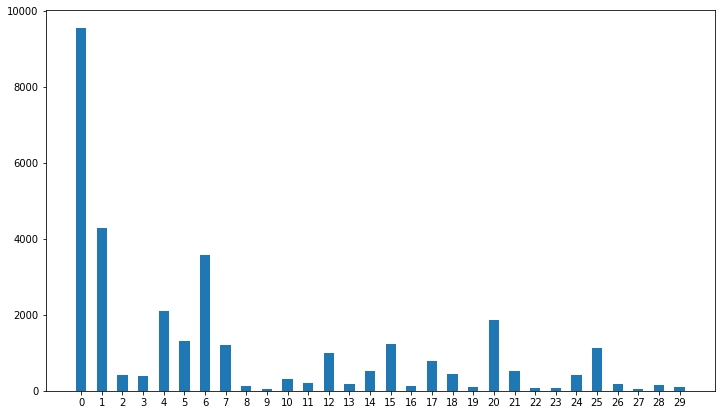

In [37]:
x = [count for count in range(len(class_list))]
y = class_list[0].to_numpy()
fig, ax = plt.subplots(1,1,figsize=(12,7))
ax.bar(x, y,width=0.5)
plt.xticks(x)
plt.show()

In [54]:
print(class_list.describe())

                 0
count    30.000000
mean   1082.333333
std    1893.036210
min      40.000000
25%     143.000000
50%     419.000000
75%    1178.750000
max    9534.000000


# Undersampling KLUE dataset v1 - reduce class 0 

## preprocessing - random choice class 0(60%)

In [38]:
import random
random.seed(42)

class0_id = klue_dataset[klue_dataset['label'] == 'no_relation']
class0_id = class0_id['id']
class0_list = class0_id.tolist()
random.shuffle(class0_list)
cut_line = int((len(class0_list) / 100) * 60)
choice_id = class0_list[:cut_line]



In [39]:
new_klue_dataset = klue_dataset[~klue_dataset['id'].isin(choice_id)]
len(new_klue_dataset)

26750

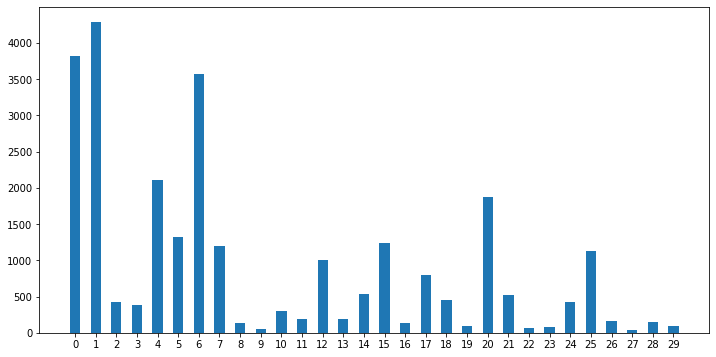

In [40]:
new_class_list = pd.DataFrame([len(new_klue_dataset[new_klue_dataset['label'] == target]) for target in label_type])
x = [count for count in range(len(new_class_list))]
y = new_class_list[0].to_numpy()
width = 0.5
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(x,y,width=0.5)
plt.xticks(x)
plt.show()

In [41]:
new_class_list.describe()

,0
count,30.000000
mean,891.666667
std,1157.653940
min,40.000000
25%,143.000000
50%,419.000000
75%,1178.750000
max,4284.000000


## Create KLUE dataset v1 csv

In [3]:
new_klue_dataset.to_csv("../dataset/train/train_v1.csv", index=False)

NameError: name 'new_klue_dataset' is not defined

# Submission analysis

## Target submission

### total

In [24]:
submission_name = './prediction/submission2.csv'
target_csv = pd.read_csv(submission_name)

with open('./dict_label_to_num.pkl', 'rb') as f:
    label_type = pickle.load(f)

target_class_list = pd.DataFrame([len(target_csv[target_csv['pred_label'] == target]) for target in label_type])

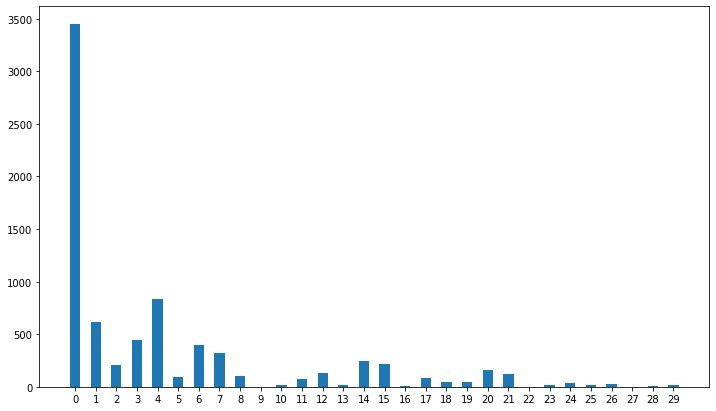

In [25]:
target_totl_x = [count for count in range(len(target_class_list))]
target_totl_y = target_class_list[0].to_numpy()
width = 0.5
fig, ax = plt.subplots(1,1,figsize=(12,7))
ax.bar(target_totl_x, target_totl_y,width=0.5)
plt.xticks(target_totl_x)
plt.show()

In [15]:
target_class_list.describe()

,0
count,30.000000
mean,258.833333
std,1235.787257
min,0.000000
25%,0.000000
50%,1.000000
75%,7.500000
max,6773.000000


### except class 0

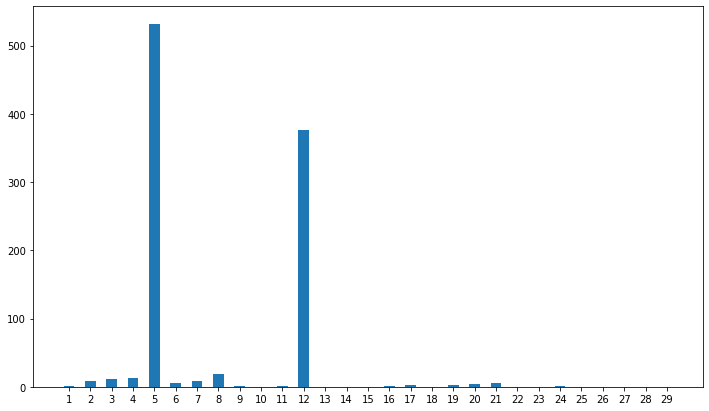

In [30]:
except_class0_list = target_class_list[1:]
x = except_class0_list.index
y = except_class0_list[0].to_numpy()
width = 0.5
fig, ax = plt.subplots(1,1,figsize=(12,7))
ax.bar(x, y,width=0.5)
plt.xticks(x)
plt.show()

## Best submission

### total

In [22]:
best_submission_name = './prediction/best_submission.csv'
best_csv = pd.read_csv(best_submission_name)

with open('./dict_label_to_num.pkl', 'rb') as f:
    label_type = pickle.load(f)

best_class_list = pd.DataFrame([len(best_csv[best_csv['pred_label'] == target]) for target in label_type])

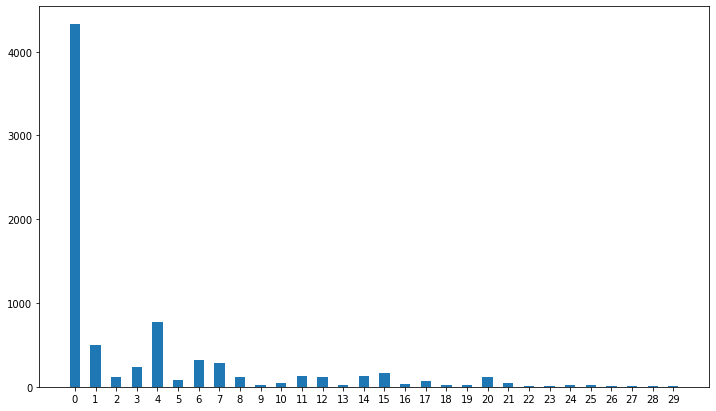

In [23]:
best_x = [count for count in range(len(best_class_list))]
best_y = best_class_list[0].to_numpy()
width = 0.5
fig, ax = plt.subplots(1,1,figsize=(12,7))
ax.bar(best_x, best_y,width=0.5)
plt.xticks(best_x)
plt.show()

### except class 0

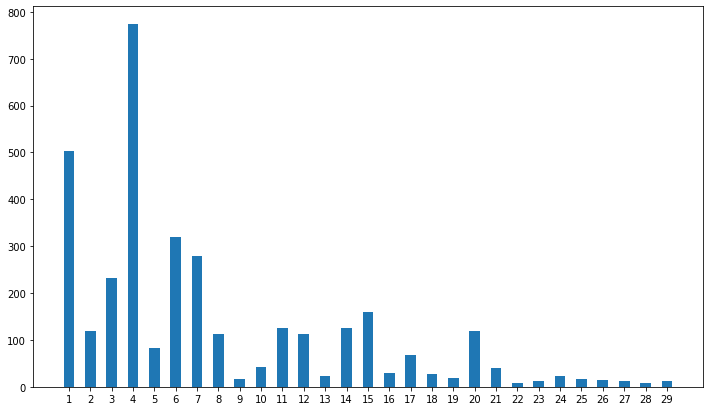

In [10]:
except_class0_list = best_class_list[1:]
except_best_x = except_class0_list.index
except_best_y = except_class0_list[0].to_numpy()
width = 0.5
fig, ax = plt.subplots(1,1,figsize=(12,7))
ax.bar(except_best_x, except_best_y,width=0.5)
plt.xticks(except_best_x)
plt.show()

## Compare

### graph 1개

#### total

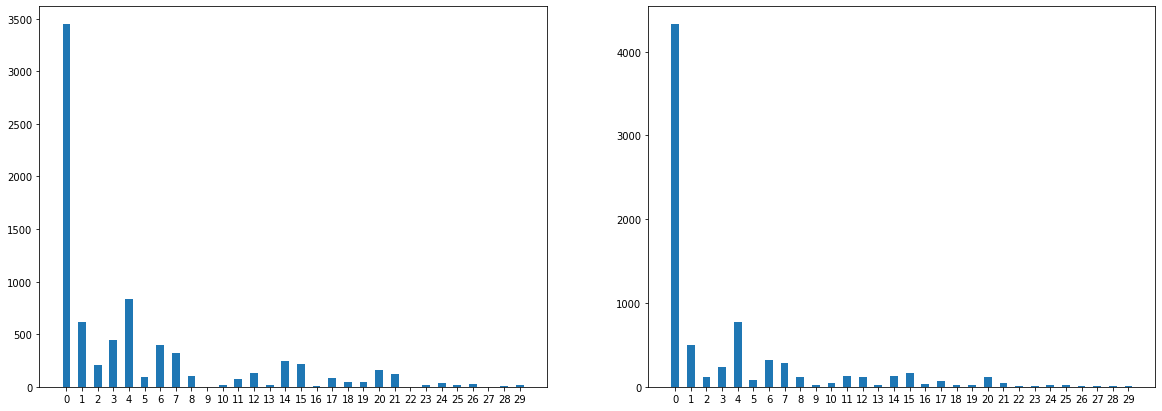

In [26]:
target_x = [count for count in range(len(target_class_list))]
target_y = target_class_list[0].to_numpy()
best_x = [count for count in range(len(best_class_list))]
best_y = best_class_list[0].to_numpy()
width = 0.5
fig, axes = plt.subplots(1,2,figsize=(20,7))
compare_list = [[target_x, target_y], [best_x, best_y]]
for ax, data in zip(axes, compare_list):
    ax.bar(data[0], data[1],width=0.5)
    ax.set_xticks(data[0])
plt.show()

#### except class 0

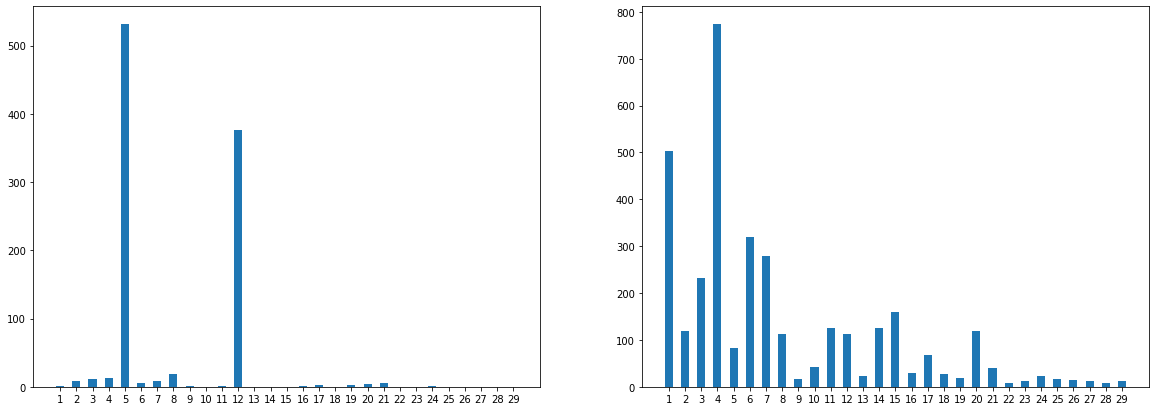

In [11]:
except_target_list = target_class_list[1:]
except_best_list = best_class_list[1:]
except_target_x = except_target_list.index
except_target_y = except_target_list[0].to_numpy()
except_best_x = except_best_list.index
except_best_y = except_best_list[0].to_numpy()
width = 0.5

fig, axes = plt.subplots(1,2,figsize=(20,7))
compare_list = [[except_target_x, except_target_y], [except_best_x, except_best_y]]
for ax, data in zip(axes, compare_list):
    ax.bar(data[0], data[1],width=0.5)
    ax.set_xticks(data[0])

plt.show()

### graph 2개

#### total

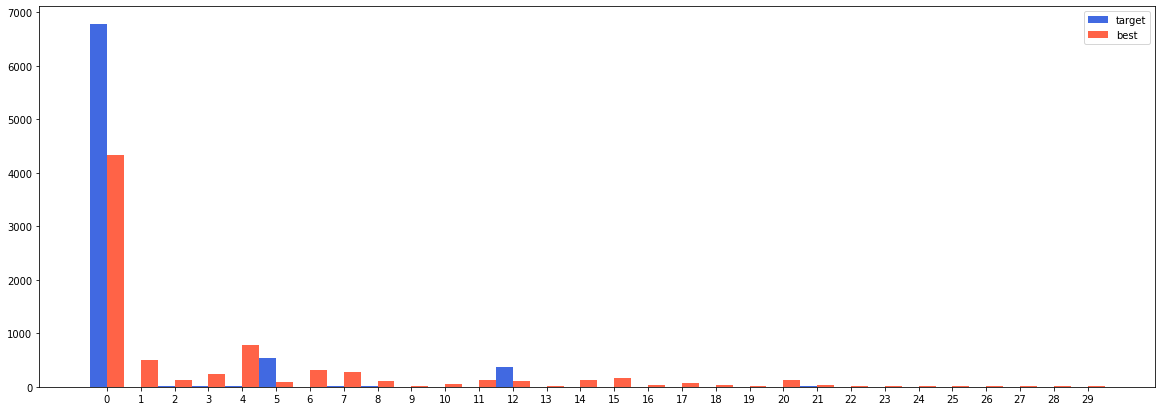

In [19]:
target_x = [count for count in range(len(target_class_list))]
target_y = target_class_list[0].to_numpy()
best_x = [count for count in range(len(best_class_list))]
best_y = best_class_list[0].to_numpy()
width = 0.5
idx = np.arange(len(target_x))
fig, ax = plt.subplots(1,1,figsize=(20,7))
ax.bar(idx-width/2, target_y, 
       color='royalblue',
       label='target',
       width=width)

ax.bar(idx+width/2, best_y, 
       color='tomato',
       label='best',
       width=width)
ax.set_xticks(idx)
ax.legend()
plt.show()

#### except class 0

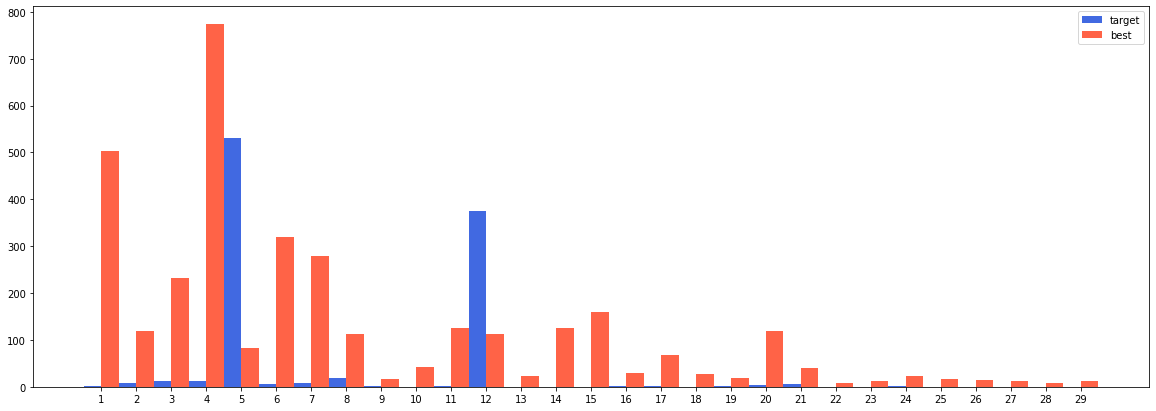

In [17]:
except_target_list = target_class_list[1:]
except_best_list = best_class_list[1:]
except_target_x = except_target_list.index
except_target_y = except_target_list[0].to_numpy()
except_best_x = except_best_list.index
except_best_y = except_best_list[0].to_numpy()
width = 0.5

idx = np.arange(1,len(except_target_x)+1)
fig, ax = plt.subplots(1,1,figsize=(20,7))
ax.bar(idx-width/2, except_target_y, 
       color='royalblue',
       label='target',
       width=width)

ax.bar(idx+width/2, except_best_y, 
       color='tomato',
       label='best',
       width=width)
ax.set_xticks(idx)
ax.legend()
plt.show()

### data compare

In [27]:
data_compare = target_csv[['id','pred_label']]
data_compare.rename(columns={'pred_label' : 'target_pred_label'}, inplace=True)
data_compare.insert(2,'best_pred_label',best_csv['pred_label'])

total_diff = data_compare[data_compare['target_pred_label'] != data_compare['best_pred_label']].copy()

with open('./dict_label_to_num.pkl', 'rb') as f:
    label_type = pickle.load(f)

group_diff = pd.DataFrame(total_diff.copy().groupby(['best_pred_label','target_pred_label']).size())
group_diff_reverse = pd.DataFrame(total_diff.copy().groupby(['target_pred_label','best_pred_label']).size())
group_diff.to_csv('./temp.csv')

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [28]:
temp_csv = pd.read_csv('./temp.csv')
filter_csv = temp_csv.sort_values(by=['0'],ascending=False)

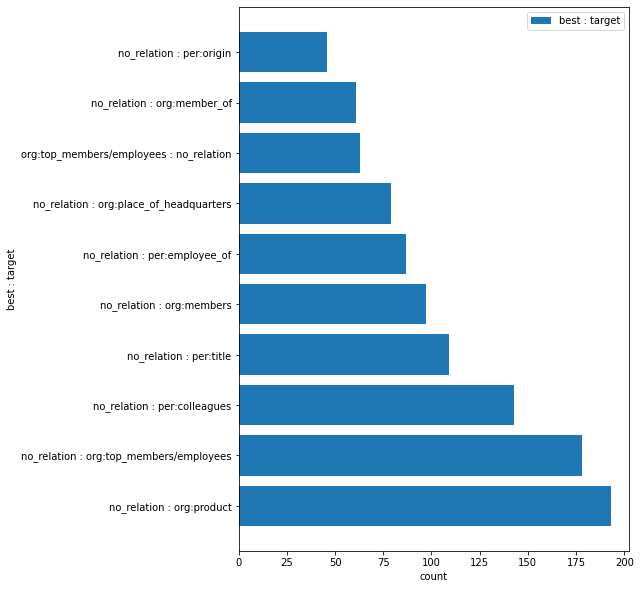

In [29]:
fig, ax = plt.subplots(1,1,figsize=(7,10))
width = 0.5
filter_x = filter_csv['best_pred_label'] + ' : ' + filter_csv['target_pred_label']
filter_y = filter_csv['0'].to_numpy()
ax.barh(filter_x[:10],filter_y[:10], label='best : target')
ax.set_ylabel('best : target')
ax.set_xlabel('count')
ax.legend()
plt.show()

In [30]:
filter_csv

,best_pred_label,target_pred_label,0
7,no_relation,org:product,193
8,no_relation,org:top_members/employees,178
11,no_relation,per:colleagues,143
25,no_relation,per:title,109
4,no_relation,org:members,97
...,...,...,...
101,per:date_of_birth,no_relation,1
100,per:colleagues,per:title,1
98,per:colleagues,per:siblings,1
96,per:colleagues,per:origin,1
